In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# data
hr_df = pd.read_csv('data/Employee.csv')
pd.set_option('display.max_columns', None)

#### Exploring HR role in different department fields

In [15]:
hr_df.head()

# Looking at count and unique departments
hr_department = hr_df['Department'].value_counts()
hr_department_unique = hr_department.unique()

# Creating Department and Counts into Dataframe
hr_department_df = pd.DataFrame({
    'Department': hr_department.index,
    'Count': hr_department.values
})

# Creating Percentage Cclumn
hr_department_df['Percentage'] = (hr_department_df['Count']/hr_department_df['Count'].sum() * 100)
hr_department_df


,Department,Count,Percentage
0,Technology,961,65.374150
1,Sales,446,30.340136
2,Human Resources,63,4.285714


#### Job Title and Count

In [4]:
# Looking at count and unique job titles
hr_dfJobRole_count = hr_df['JobRole'].value_counts()
hr_dfJobUnique= hr_dfJobRole_count.unique()

# Turning into a dataframe
hr_jobs_df = pd.DataFrame({
    'JobTitle': hr_dfJobRole_count.index,
    'Count': hr_dfJobUnique
})

hr_jobs_df

,JobTitle,Count
0,Sales Executive,327
1,Software Engineer,294
2,Data Scientist,261
3,Machine Learning Engineer,146
4,Senior Software Engineer,132
5,Sales Representative,83
6,Engineering Manager,75
7,Analytics Manager,52
8,Manager,37
9,HR Executive,28


##### Boxplot for Different Job Titles

In [5]:
job_role_salaries = hr_df.groupby('JobRole')['Salary'].describe(percentiles=[.25, .5, .75])

job_role_salaries

,count,mean,std,min,25%,50%,75%,max
JobRole,,,,,,,,
Analytics Manager,52.0,346484.230769,118080.676209,107863.0,252839.50,355858.5,448177.75,547204.0
Data Scientist,261.0,56079.494253,43547.070678,20387.0,32456.00,44057.0,65416.00,455643.0
Engineering Manager,75.0,286258.506667,91001.990610,115110.0,215367.50,292500.0,336153.50,539998.0
HR Business Partner,7.0,314002.428571,104142.207510,190466.0,229615.00,309964.0,396225.50,445906.0
HR Executive,28.0,94362.321429,43767.654180,41745.0,55655.25,89376.0,131310.75,201564.0
HR Manager,4.0,449330.750000,92157.549484,315071.0,426056.00,486156.0,509430.75,509940.0
Machine Learning Engineer,146.0,130164.616438,76486.269014,39456.0,69932.50,98598.5,194454.00,366078.0
Manager,37.0,317531.054054,95375.631038,135407.0,265712.00,313891.0,377203.00,513262.0
Recruiter,24.0,37647.500000,15103.645094,20583.0,26099.00,30853.5,48956.50,70703.0


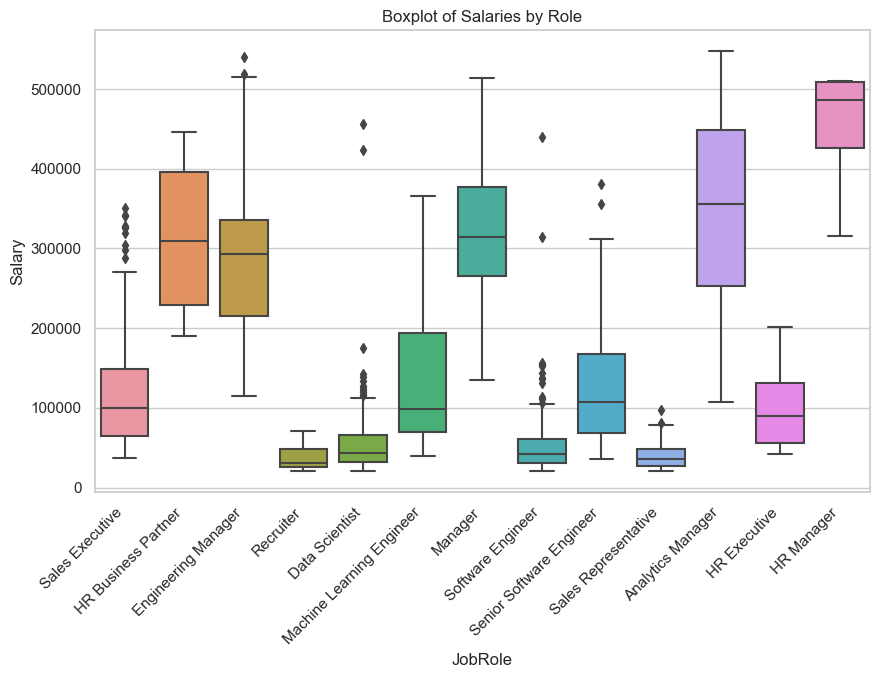

In [6]:
# Plot boxplot based on job title and salary

sns.set_theme(style="whitegrid")  
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='Salary', data=hr_df)
plt.xticks(rotation=45, ha='right')  
plt.title('Boxplot of Salaries by Role')
plt.show()

#### Level of Education

In [7]:
education_level = hr_df.groupby('Education')
education_level 
education_counts = hr_df['Education'].value_counts()

education_counts

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

#### Commute

In [8]:
hr_df.head(10)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
5,C219-6C2E,Clerkclaude,Hinkins,Male,34,Some Travel,Sales,30,NY,Mixed or multiple ethnic groups,2,Marketing,Sales Executive,Divorced,133468,1,No,2012-01-05,No,10,3,7,9
6,D906-B674,Uta,Melmar,Female,42,No Travel,Technology,45,NY,Black or African American,3,Information Systems,Engineering Manager,Married,259284,1,No,2012-01-09,No,10,2,6,6
7,3C7D-86ED,Joyan,Brason,Female,40,Some Travel,Sales,3,CA,Native Hawaiian,2,Other,Sales Executive,Divorced,104426,1,No,2012-01-11,No,10,3,4,6
8,3D71-8DC2,Alix,Blazejewski,Male,38,Some Travel,Sales,20,IL,Black or African American,4,Marketing,Sales Executive,Married,147098,1,No,2012-01-11,No,10,5,8,2
9,5476-CA0D,Kayley,Snoad,Female,31,Frequent Traveller,Technology,4,NY,Native Hawaiian,2,Information Systems,Data Scientist,Single,69747,0,No,2012-01-12,Yes,6,5,5,1


In [9]:
# Convert 'DistanceFromHome (KM)' into integer
hr_df['DistanceFromHome (KM)'] = hr_df['DistanceFromHome (KM)'].astype(int)

# Calculate the average commute distance in KM and Miles
avg_commute_km = hr_df['DistanceFromHome (KM)'].mean()
avg_commute_m = avg_commute_km * .621371

# Print
print(f"The average commute distance in KM {round(avg_commute_km, 2)}")
print(f"The average commute distance in M {round(avg_commute_m, 2)}")

The average commute distance in KM 22.5
The average commute distance in M 13.98


In [10]:
hr_job_yearly = hr_df

# Create new column extracting year using Regex
hr_job_yearly['Year'] = hr_job_yearly['HireDate'].str.extract(r'^(\d{4})')
hr_job_yearly

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,Year
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,2012
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,2012-01-04,No,10,6,10,0,2012
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,2012-01-04,No,10,6,10,8,2012
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,2012-01-05,No,10,10,10,0,2012
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,2012-01-05,Yes,6,1,1,6,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,2,Computer Science,Software Engineer,Single,38508,0,No,2022-12-26,No,0,0,0,0,2022
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,3,Business Studies,Senior Software Engineer,Single,92995,3,No,2022-12-30,No,0,0,0,0,2022
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,4,Marketing,Sales Executive,Single,63375,0,No,2022-12-30,No,0,0,0,0,2022
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,3,Information Systems,Data Scientist,Married,46521,0,No,2022-12-30,No,0,0,0,0,2022


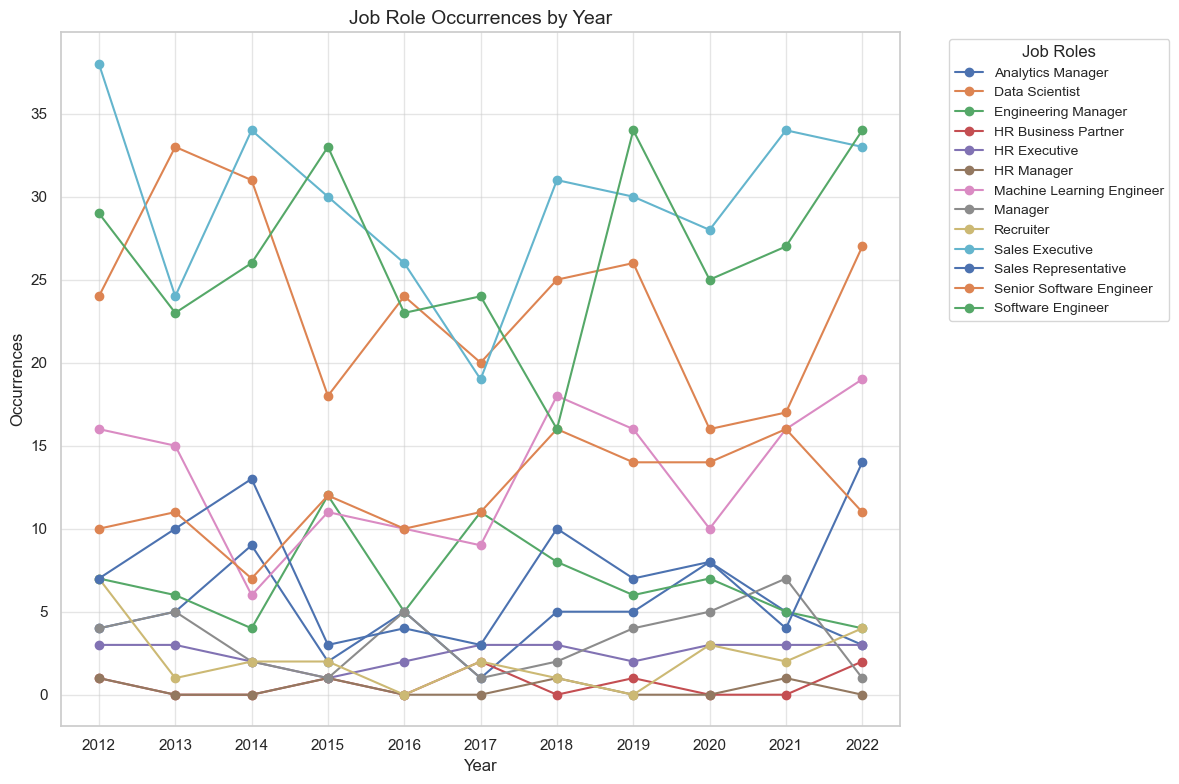

In [11]:
# Group by Year and JobRole, then count occurrences
jobrole_count_by_year = hr_job_yearly.groupby(['Year', 'JobRole']).size().unstack(fill_value=0)

# Plotting multiple line graphs
plt.figure(figsize=(12, 8))

for role in jobrole_count_by_year.columns:
    plt.plot(jobrole_count_by_year.index, jobrole_count_by_year[role], marker='o', label=role)

# Adding titles and labels
plt.title('Job Role Occurrences by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Occurrences', fontsize=12)
plt.grid(alpha=0.5)

# Positioning the legend outside the graph
plt.legend(title='Job Roles', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

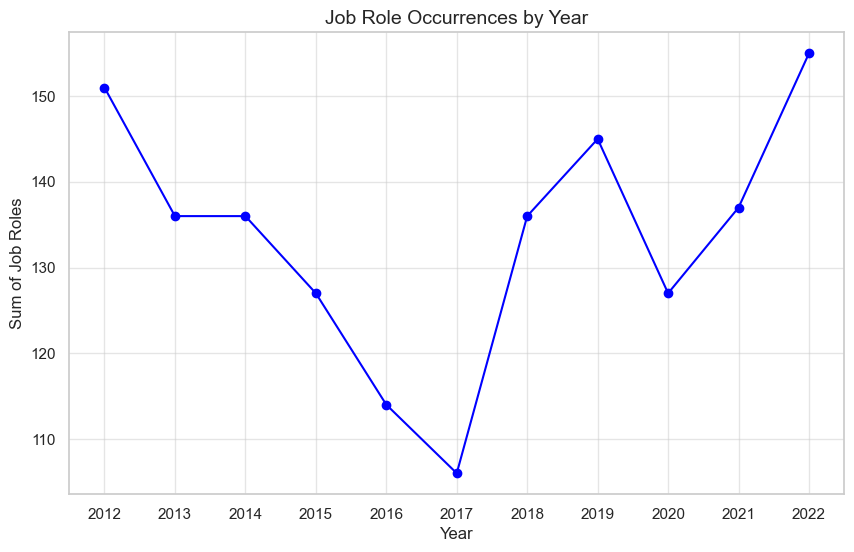

In [12]:
# Group by Year and count occurrences of JobRole
jobrole_count_by_year = hr_job_yearly.groupby('Year').size()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(jobrole_count_by_year.index, jobrole_count_by_year.values, marker='o', linestyle='-', color='blue')

# Adding titles and labels
plt.title('Job Role Occurrences by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sum of Job Roles', fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()

#### Years & Job Postings (NOT USING)

#### Year & Attrition

In [13]:
# Keep year_attrition as a DataFrame
year_attrition = hr_df[[ 'Year', 'Attrition']]

# Convert 'Year' to integer
year_attrition['Year'] = year_attrition['Year'].astype(int)

# Count occurrences of 'Yes' and 'No' for each year
attrition_counts = year_attrition.groupby(['Year', 'Attrition']).size().unstack(fill_value=0)

attrition_counts

C:\Users\Lesther\AppData\Local\Temp\ipykernel_22672\492241196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_attrition['Year'] = year_attrition['Year'].astype(int)


Attrition,No,Yes
Year,,
2012,127,24
2013,113,23
2014,113,23
2015,112,15
2016,90,24
2017,95,11
2018,114,22
2019,124,21
2020,99,28


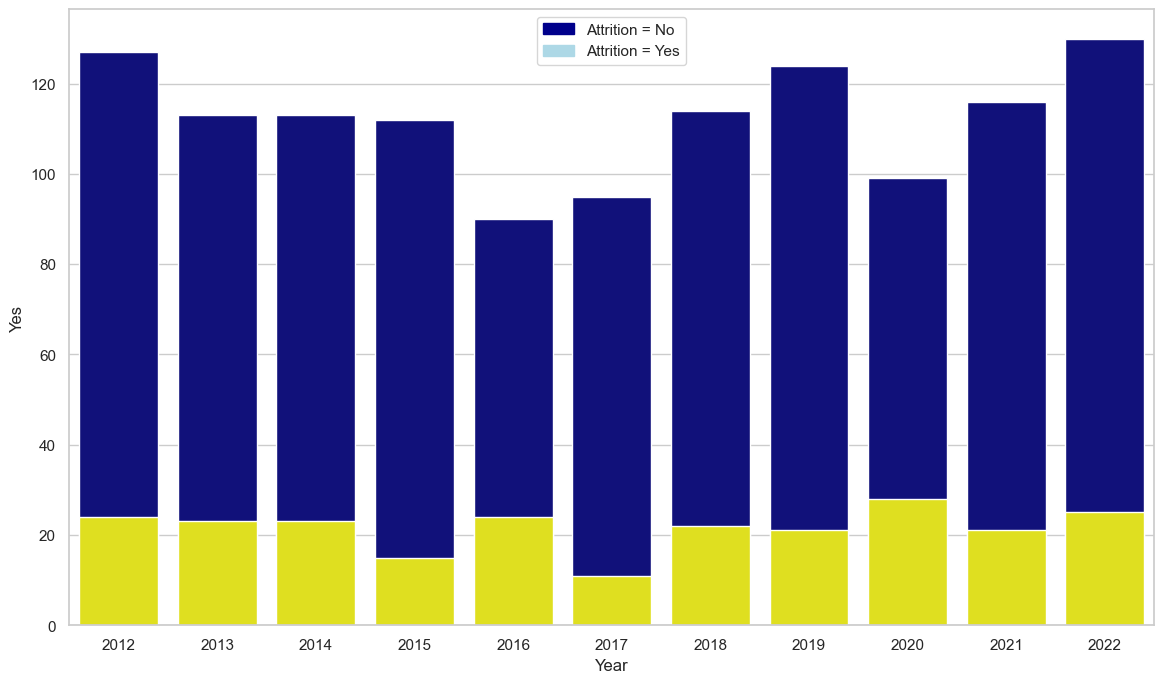

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Reset index so that 'Year' is a column
attrition_counts_reset = attrition_counts.reset_index()

# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Create the figure and specify the size
plt.figure(figsize=(14, 8))

# Bar chart for 'Attrition = No' (dark blue)
bar1 = sns.barplot(x="Year", y="No", data=attrition_counts_reset, color='darkblue')

# Bar chart for 'Attrition = Yes' (light blue)
bar2 = sns.barplot(x="Year", y="Yes", data=attrition_counts_reset, color='yellow')

# Add legend
top_bar = mpatches.Patch(color='darkblue', label='Attrition = No')
bottom_bar = mpatches.Patch(color='lightblue', label='Attrition = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# Display the graph
plt.show()


#### Average Years in Job/Promotion

In [21]:
years_in_company_num = hr_df['YearsAtCompany'].mean()
years_last_promotion = hr_df['YearsSinceLastPromotion'].mean()
years_in_recentRole = hr_df['YearsInMostRecentRole'].mean()

print("Years in company:", years_in_company_num)
print("Years since promotion:", years_last_promotion)
print("Years in recent role:", years_in_recentRole)


Years in company: 4.562585034013606
Years since promotion: 3.440816326530612
Years in recent role: 2.2931972789115647


#### Overtime Y/N

In [36]:
count_no_yes = hr_df['OverTime']

no_count = 0
yes_count = 0

for i in count_no_yes:
    if i == 'No':
        no_count += 1
    elif i == 'Yes':
        yes_count += 1


total = no_count + yes_count
no_percent = round(no_count/total, 2)
yes_percent = round(yes_count/total, 2)
print("no count", no_count , "(", no_percent , ")")
print("yes count", yes_count, "(", yes_percent , ")")

no count 1054 ( 0.72 )
yes count 416 ( 0.28 )
